# Data prepration in python

# Data reading

In [1]:
import nltk
import pandas as pd
import numpy as np

In [2]:
SMS_data=pd.read_csv('Spam_data.csv',sep='\t',names=['label','text'])

In [3]:
SMS_data.head(n=5)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [37]:
SMS_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [4]:
SMS_data['text_len']=SMS_data['text'].apply(len)

In [5]:
SMS_data.head()

,label,text,text_len
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Data Visualizing

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a118bc0f0>]],
      dtype=object)

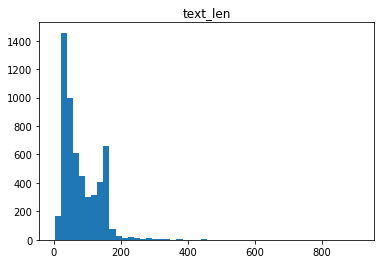

In [8]:
SMS_data.hist(column='text_len',bins=50,figsize=(6,4),grid=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1a11985ac8>,
      dtype=object)

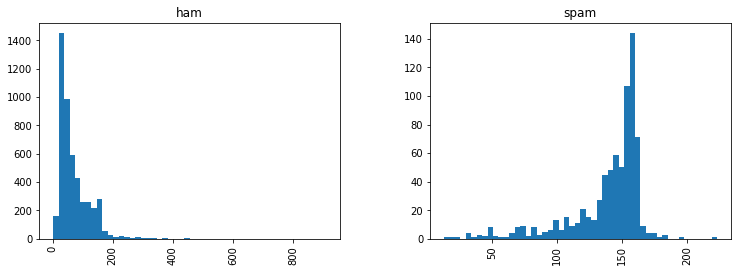

In [9]:
SMS_data.hist(column='text_len',by='label',bins=50,figsize=(12,4))

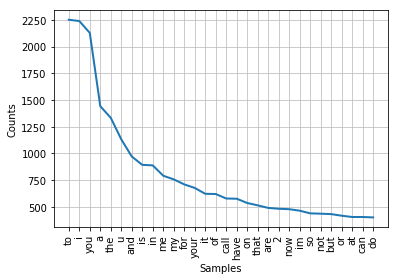

In [10]:
#maketrans make a dictionary of translation table with ordinal representation
#ord(97)=a
#string.punctuation--> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
import string
from nltk.corpus import stopwords
txt = " ".join(SMS_data['text'])
translator = str.maketrans('', '', string.punctuation)
words=txt.translate(translator).lower().split()
fd = nltk.FreqDist(words)
fd.plot(30,cumulative=False)

In [77]:
fd.most_common(20)

[('to', 2251),
 ('i', 2239),
 ('you', 2128),
 ('a', 1442),
 ('the', 1333),
 ('u', 1132),
 ('and', 971),
 ('is', 893),
 ('in', 888),
 ('me', 791),
 ('my', 757),
 ('for', 710),
 ('your', 677),
 ('it', 622),
 ('of', 620),
 ('call', 578),
 ('have', 576),
 ('on', 536),
 ('that', 514),
 ('are', 490)]

In [16]:
w_list=[w for w in words if w not in stopwords.words('english')]

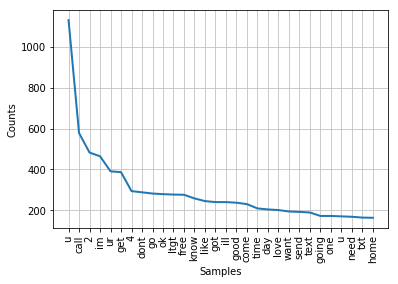

In [17]:
all_words=nltk.FreqDist(w_list)
all_words.plot(30,cumulative=False)

# Classifier Algorithm

In [18]:
#convert dictionary to the list
word_common=all_words.most_common()[:3000]

In [19]:
word_common[:10]

[('u', 1132),
 ('call', 578),
 ('2', 482),
 ('im', 464),
 ('ur', 390),
 ('get', 386),
 ('4', 293),
 ('dont', 287),
 ('go', 281),
 ('ok', 278)]

In [20]:
word_features=[w[0] for w in word_common]

In [21]:
SMS_data.values[0]

array(['ham',
       'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       111], dtype=object)

In [22]:
#index the word_common for each SMS
def find_feature(document):
    features={}
    words=document.split()
    for w in word_common:
        features[w[0]]=(w[0] in words)
    return features

Feature_set=[]
#i=row index
#row values
for i, row in enumerate(SMS_data.values):
    label, text,text_len=row
    Feature_set.append((find_feature(text),label))  

In [26]:
train_set=Feature_set[:3000]
test_set=Feature_set[3000:]

In [57]:
train_set[0]

({'u': False,
  'call': False,
  'get': False,
  'ur': False,
  'gt': False,
  'lt': False,
  'ok': False,
  'go': False,
  'free': False,
  'know': False,
  'like': False,
  'good': False,
  'day': False,
  'got': True,
  'come': False,
  'time': False,
  'love': False,
  'send': False,
  'want': False,
  'text': False,
  'p': False,
  'txt': False,
  'n': True,
  'one': False,
  'going': False,
  'r': False,
  'need': False,
  'home': False,
  'stop': False,
  'lor': False,
  'k': False,
  'today': False,
  'sorry': False,
  'see': False,
  'still': False,
  'back': False,
  'da': False,
  'dont': False,
  'reply': False,
  'mobile': False,
  'take': False,
  'hi': False,
  'tell': False,
  'new': False,
  'please': False,
  'later': False,
  'pls': False,
  'think': False,
  'c': False,
  'phone': False,
  'week': False,
  'dear': False,
  'well': False,
  'night': False,
  'much': False,
  'great': True,
  'oh': False,
  'hope': False,
  'claim': False,
  'msg': False,
  'hey': Fal

In [27]:
classifier=nltk.NaiveBayesClassifier.train(train_set)

In [28]:
print("Naive bayes algorithm accuracy percent:",(nltk.classify.accuracy(classifier,test_set))*100)

Naive bayes algorithm accuracy percent: 96.30637636080871


What this tells you is the ratio of occurences in negative to positive, or visa versa, for every word. So here, we can see that the term "www" appears 238.1  more times as often in spam as it does in ham.

In [106]:
classifier.show_most_informative_features(3000)

Most Informative Features
                     www = True             spam : ham    =    238.1 : 1.0
                     box = True             spam : ham    =    166.5 : 1.0
                       p = True             spam : ham    =    135.6 : 1.0
                 service = True             spam : ham    =    128.5 : 1.0
                     txt = True             spam : ham    =     86.4 : 1.0
                landline = True             spam : ham    =     73.8 : 1.0
                     age = True             spam : ham    =     65.3 : 1.0
                    rate = True             spam : ham    =     65.3 : 1.0
                  mobile = True             spam : ham    =     62.6 : 1.0
                    code = True             spam : ham    =     61.1 : 1.0
                     win = True             spam : ham    =     59.7 : 1.0
                      po = True             spam : ham    =     56.9 : 1.0
                   video = True             spam : ham    =     48.5 : 1.0

                      er = False             ham : spam   =      1.0 : 1.0
                original = False             ham : spam   =      1.0 : 1.0
                    seem = False             ham : spam   =      1.0 : 1.0
                 running = False             ham : spam   =      1.0 : 1.0
                 pleased = False             ham : spam   =      1.0 : 1.0
                   cross = False             ham : spam   =      1.0 : 1.0
                      px = False             ham : spam   =      1.0 : 1.0
                   helen = False             ham : spam   =      1.0 : 1.0
                     fav = False             ham : spam   =      1.0 : 1.0
                contract = False             ham : spam   =      1.0 : 1.0
                     hol = False             ham : spam   =      1.0 : 1.0
                  unique = False             ham : spam   =      1.0 : 1.0
                     zoe = False             ham : spam   =      1.0 : 1.0
                  london 

                   fault = False            spam : ham    =      1.0 : 1.0
                    evng = False            spam : ham    =      1.0 : 1.0
               including = False            spam : ham    =      1.0 : 1.0
                     btw = False            spam : ham    =      1.0 : 1.0
                 anyways = False            spam : ham    =      1.0 : 1.0
                    wats = False            spam : ham    =      1.0 : 1.0
                    mite = False            spam : ham    =      1.0 : 1.0
                hospital = False            spam : ham    =      1.0 : 1.0
                      xy = False            spam : ham    =      1.0 : 1.0
                    list = False            spam : ham    =      1.0 : 1.0
                     tea = False            spam : ham    =      1.0 : 1.0
               character = False            spam : ham    =      1.0 : 1.0
              confidence = False            spam : ham    =      1.0 : 1.0
                 respect 

# Text blob

A sentence could be stating a fact( objective) or expressing an opinion( subjective). Determining this is a classification of a sentence as being objective or subjective
For sentences tagged as subjective in the classification, one could further classify those sentences as expressing a positive or negative sentiment - weeding out objective statements may help improve the performance of sentiment classification into positive and negative sentiment.
So in essence given a sentence - one could first use a classifier to label a sentence as subjective or objective and then do another classification to further classify subjective sentences as either positive or negative.

Note:
research has shown the presence of adjectives and adverbs is usually a good indicator of text subjectivity. In other words, statements that use adjectives like “interesting,” “problematic” and “awesome” might be more likely to convey a subjective point of view than statements that do not include those adjectives.

In [62]:
#textblob is on top of nltk but vader is just sentiment library
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
# blob does text analytic which can be shown by directory
# such as noun phrase, np_counts, sentiment
analyzer = SentimentIntensityAnalyzer()

In [63]:
f=open("/Users/atousa/Desktop/McMaster/BDA-102/Week4-TextMining/positive_new.txt","rb")
txt_pos=f.read().decode('utf-8',errors='ignore')
f.close()
lines_pos=txt_pos.split('\n')

f=open("/Users/atousa/Desktop/McMaster/BDA-102/Week4-TextMining/negative_new.txt","rb")
txt_neg=f.read().decode('utf-8',errors='ignore')
f.close()
lines_neg=txt_neg.split('\n')

In [64]:
lines_pos[0]

'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . '

In [135]:
vs = analyzer.polarity_scores(lines_pos[0])

#The Positive, Negative and Neutral scores represent the proportion of text that falls in these categories. This means our sentence was rated as 8.2% Positive, 91.8% Neutral and 0% Negative. Hence all these should add up to 1.

The Compound score is a metric that calculates the sum of all the lexicon ratings which have been normalized between -1(most extreme negative) and +1 (most extreme positive). 
In the case , lexicon ratings for andsupercool are 2.9and respectively1.3. The compound score turns out to be 0.75 , denoting a very high positive sentiment.

lexicon rating for the words are listed:
https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt

In [136]:
vs

{'neg': 0.0, 'neu': 0.918, 'pos': 0.082, 'compound': 0.3612}

In [139]:
pos_count = 0
pos_correct = 0

for line in lines_pos:
        vs = analyzer.polarity_scores(line)
        if vs['pos']>vs['neg']:
                pos_correct += 1
        pos_count +=1

In [140]:
neg_count = 0
neg_correct = 0

for line in lines_neg:
        vs = analyzer.polarity_scores(line)
        if vs['neg']>vs['pos']:
                neg_correct += 1
        neg_count +=1

In [141]:
print("Positive accuracy = {}% via {} samples".format(pos_correct/pos_count*100.0, pos_count))
print("Negative accuracy = {}% via {} samples".format(neg_correct/neg_count*100.0, neg_count))

Positive accuracy = 69.69810613163322% via 5333 samples
Negative accuracy = 40.052503281455095% via 5333 samples
